In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

## Drawing a graph

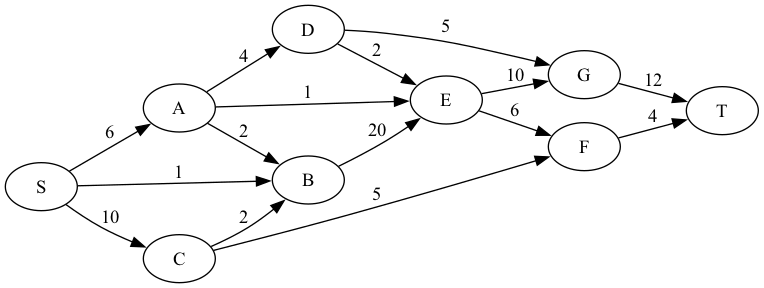

In [2]:
edges = ['SA6', 'SB1', 'SC10', 'AB2', 'CB2', 'AE1', 'AD4', 'DE2', 'DG5', 'EG10', 'BE20', 'CF5', 'EF6', 'FT4', 'GT12']

pgv_graph = pgv.AGraph(directed=True, rankdir='LR')
for e in edges:
    pgv_graph.add_edge(e[0], e[1], label=e[2:])

pgv_graph.layout(prog='dot')
pgv_graph.draw('network.png')
Image('network.png')

## Finding (and visualizing) the maximum flow

In [3]:
nx_graph = nx.DiGraph()
for e in edges:
    nx_graph.add_edge(e[0], e[1], capacity=int(e[2:]))

flow = nx.maximum_flow(nx_graph, 'S', 'T')
print('Flow value:', flow[0])
print('Flow:')
for u in flow[1]:
    print(f'{u}: {flow[1][u]}')

Flow value: 13
Flow:
S: {'A': 6, 'B': 1, 'C': 6}
A: {'B': 1, 'E': 1, 'D': 4}
B: {'E': 4}
C: {'B': 2, 'F': 4}
E: {'G': 5, 'F': 0}
D: {'E': 0, 'G': 4}
G: {'T': 9}
F: {'T': 4}
T: {}


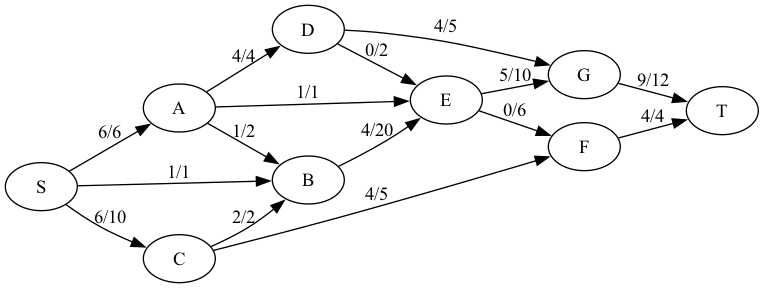

In [4]:
for u in flow[1]:
    for v in flow[1][u]:
        e = pgv_graph.get_edge(u, v)
        e.attr['label'] = f"{flow[1][u][v]}/{e.attr['label']}"

pgv_graph.draw('network_flow.png')
Image('network_flow.png')

## Finding (and visualizing) the minimum cut

In [6]:
cut = nx.minimum_cut(nx_graph, 'S', 'T')
print('Cut capacity:', cut[0])
print('Cut:', cut[1])

Cut capacity: 13
Cut: ({'F', 'C', 'S'}, {'G', 'E', 'B', 'A', 'T', 'D'})


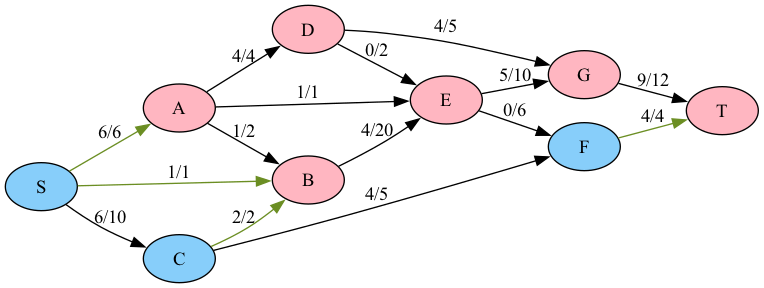

In [7]:
for u in pgv_graph.nodes():
    pgv_graph.get_node(u).attr['style'] = 'filled'
    pgv_graph.get_node(u).attr['fillcolor'] = 'lightskyblue' if u in cut[1][0] else 'lightpink'

for u, v in pgv_graph.edges():
    if u in cut[1][0] and v in cut[1][1]:
        pgv_graph.get_edge(u, v).attr['color'] = 'olivedrab'

pgv_graph.draw('network_cut.png')
Image('network_cut.png')